# Relationship between Covid-19 And Temperature 

In this project, my primary goal is to find the factors that impact transmission rate of COVID-19, specifically Temperature. I am trying to answer the below question: What the relationsihp between Covid-19 and Temperature be like? can higher Temperature in tropical area help to prevent or slow down the transmission rate? 

In [291]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import warnings 
warnings.filterwarnings("ignore")
from datetime import datetime
import plotly.graph_objects as go
import os
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)

# Data Preprocess

In [367]:
covid_confirm = pd.read_csv('COVID-19/confirmed_global.csv')
covid_death=pd.read_csv('COVID-19/deaths_global.csv')
covid_recover=pd.read_csv('COVID-19/recovered_global.csv')

In [368]:
covid_confirm.head(5)

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  6/18/20  6/19/20  6/20/20  6/21/20  \
0        0        0        0  ...    27532    27878    28424    28833   
1        0        0        0  ...     1788     1838     1891     1962   
2        0        0        0  ...    11385    11504    11631    11771   
3        0        0        0  ...      855      855      855      855   
4        0        0        0  ...      166      172      176      183   

   6/22/20  6/23/20  6/24/20  6/25/20  6/26/20  6/27/20  
0    29157    29481    29640    30175    30451    30616  
1     1995     2047     2114     2192     2269     2330  
2    11920    12076    12248    12445    12685    12968  
3      855      855      855      855      855      855  
4      186      189      197      212      212      259  

[5 rows x 162 columns]

In [369]:
covid_confirm = covid_confirm.drop(['Province/State', 'Lat', 'Long'], axis = 1)
covid_confirm.shape

(266, 159)

## By day

### Confirm 

In [370]:
covid_confirm = covid_confirm.groupby(by = 'Country/Region').sum()
covid_confirm.head(3)

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Country/Region                                                                  
Afghanistan           0        0        0        0        0        0        0   
Albania               0        0        0        0        0        0        0   
Algeria               0        0        0        0        0        0        0   

                1/29/20  1/30/20  1/31/20  ...  6/18/20  6/19/20  6/20/20  \
Country/Region                             ...                              
Afghanistan           0        0        0  ...    27532    27878    28424   
Albania               0        0        0  ...     1788     1838     1891   
Algeria               0        0        0  ...    11385    11504    11631   

                6/21/20  6/22/20  6/23/20  6/24/20  6/25/20  6/26/20  6/27/20  
Country/Region                                                                 
Afghanistan       28833    29157    29481    29640    30175    30451    30616  
Albania            1962     1995     2047     2114     2192     2269     2330  
Algeria           11771    11920    12076    12248    12445    12685    12968  

[3 rows x 158 columns]

In [209]:
covid_confirm=covid_confirm.diff(axis=1).fillna(0)
covid_confirm['confirmed'] = covid_confirm.sum(axis=1).astype(int)
covid_confirm.head(3)

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Country/Region                                                                  
Afghanistan         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
Albania             0.0      0.0      0.0      0.0      0.0      0.0      0.0   
Algeria             0.0      0.0      0.0      0.0      0.0      0.0      0.0   

                1/29/20  1/30/20  1/31/20  ...  6/19/20  6/20/20  6/21/20  \
Country/Region                             ...                              
Afghanistan         0.0      0.0      0.0  ...    346.0    546.0    409.0   
Albania             0.0      0.0      0.0  ...     50.0     53.0     71.0   
Algeria             0.0      0.0      0.0  ...    119.0    127.0    140.0   

                6/22/20  6/23/20  6/24/20  6/25/20  6/26/20  6/27/20  \
Country/Region                                                         
Afghanistan       324.0    324.0    159.0    535.0    276.0    165.0   
Albania            33.0     52.0     67.0     78.0     77.0     61.0   
Algeria           149.0    156.0    172.0    197.0    240.0    283.0   

                confirmed  
Country/Region             
Afghanistan         30616  
Albania              2330  
Algeria             12968  

[3 rows x 159 columns]

### Death

In [213]:
covid_death = covid_death.drop(['Province/State', 'Lat', 'Long'], axis = 1).groupby(by = 'Country/Region').sum()
covid_death=covid_death.diff(axis=1).fillna(0)
covid_death['death'] = covid_death.sum(axis=1).astype(int)
covid_death.head(3)

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Country/Region                                                                  
Afghanistan         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
Albania             0.0      0.0      0.0      0.0      0.0      0.0      0.0   
Algeria             0.0      0.0      0.0      0.0      0.0      0.0      0.0   

                1/29/20  1/30/20  1/31/20  ...  6/19/20  6/20/20  6/21/20  \
Country/Region                             ...                              
Afghanistan         0.0      0.0      0.0  ...      2.0     21.0     12.0   
Albania             0.0      0.0      0.0  ...      3.0      1.0      1.0   
Algeria             0.0      0.0      0.0  ...     14.0     12.0      8.0   

                6/22/20  6/23/20  6/24/20  6/25/20  6/26/20  6/27/20  death  
Country/Region                                                               
Afghanistan        17.0     20.0     21.0     36.0      8.0     20.0    703  
Albania             0.0      1.0      2.0      2.0      2.0      2.0     53  
Algeria             7.0      9.0      8.0      9.0      7.0      7.0    892  

[3 rows x 159 columns]

### Recovered

In [220]:
covid_recover = covid_recover.drop(['Province/State', 'Lat', 'Long'], axis = 1).groupby(by = 'Country/Region').sum()
covid_recover=covid_recover.diff(axis=1).fillna(0)
covid_recover['recover'] = covid_recover.sum(axis=1).astype(int)
covid_recover.head(3)

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Country/Region                                                                  
Afghanistan         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
Albania             0.0      0.0      0.0      0.0      0.0      0.0      0.0   
Algeria             0.0      0.0      0.0      0.0      0.0      0.0      0.0   

                1/29/20  1/30/20  1/31/20  ...  6/19/20  6/20/20  6/21/20  \
Country/Region                             ...                              
Afghanistan         0.0      0.0      0.0  ...    302.0    330.0    472.0   
Albania             0.0      0.0      0.0  ...     28.0     12.0      8.0   
Algeria             0.0      0.0      0.0  ...    118.0    128.0     98.0   

                6/22/20  6/23/20  6/24/20  6/25/20  6/26/20  6/27/20  recover  
Country/Region                                                                 
Afghanistan        77.0    419.0    609.0    305.0    132.0    368.0    10674  
Albania            25.0     36.0     22.0     33.0     48.0     48.0     1346  
Algeria           137.0    115.0    118.0    128.0    146.0    136.0     9202  

[3 rows x 159 columns]

## By Month

In [371]:
confirm_month = covid_confirm.T.reset_index()
confirm_month['index']=pd.to_datetime(confirm_month['index'], errors='coerce').dt.month
confirm_month = confirm_month.set_index(['index']).T.diff(axis=1).fillna(0)
confirm_month.head(3)

index             1    1    1    1    1    1    1    1    1    1  ...      6  \
Country/Region                                                    ...          
Afghanistan     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  658.0   
Albania         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   66.0   
Algeria         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  117.0   

index               6      6      6      6      6      6      6      6      6  
Country/Region                                                                 
Afghanistan     346.0  546.0  409.0  324.0  324.0  159.0  535.0  276.0  165.0  
Albania          50.0   53.0   71.0   33.0   52.0   67.0   78.0   77.0   61.0  
Algeria         119.0  127.0  140.0  149.0  156.0  172.0  197.0  240.0  283.0  

[3 rows x 158 columns]

In [372]:
confirm_month = confirm_month.T.groupby(by='index').sum().T
confirm_month.head(3)

index             1    2      3       4        5        6
Country/Region                                           
Afghanistan     0.0  1.0  173.0  1997.0  13034.0  15411.0
Albania         0.0  0.0  243.0   530.0    364.0   1193.0
Algeria         0.0  1.0  715.0  3290.0   5388.0   3574.0

In [224]:
death_month = covid_death.T.reset_index()
death_month['index']=pd.to_datetime(death_month['index'], errors='coerce').dt.month
death_month = death_month.set_index(['index'])
death_month = death_month.groupby(by='index').sum().T
death_month.head(3)

index           1.0  2.0   3.0    4.0    5.0    6.0
Country/Region                                     
Afghanistan     0.0  0.0   4.0   60.0  193.0  446.0
Albania         0.0  0.0  15.0   16.0    2.0   20.0
Algeria         0.0  0.0  44.0  406.0  203.0  239.0

In [225]:
recover_month = covid_recover.T.reset_index()
recover_month['index']=pd.to_datetime(recover_month['index'], errors='coerce').dt.month
recover_month = recover_month.set_index(['index'])
recover_month = recover_month.groupby(by='index').sum().T
recover_month.head(3)

index           1.0  2.0   3.0     4.0     5.0     6.0
Country/Region                                        
Afghanistan     0.0  0.0   5.0   255.0  1068.0  9346.0
Albania         0.0  0.0  52.0   418.0   402.0   474.0
Algeria         0.0  0.0  46.0  1733.0  3969.0  3454.0

# Total Number 

In [226]:
covid = pd.DataFrame(data = {
                             'confirmed':covid_confirm['confirmed'], 'death':covid_death['death'],
                               'recovered':covid_recover['recover'],
                               'active':covid_confirm['confirmed']-covid_death['death']-covid_recover['recover']
                            })
covid.sort_values(by='confirmed', ascending = False)

confirmed   death  recovered   active
Country/Region                                              
US                       2510150  125539     679308  1705303
Brazil                   1313667   57070     727715   528882
Russia                    626779    8958     392703   225118
India                     528859   16095     309713   203051
United Kingdom            311727   43598       1364   266765
...                          ...     ...        ...      ...
Saint Kitts and Nevis         15       0         15        0
Holy See                      12       0         12        0
Papua New Guinea              11       0          8        3
Western Sahara                10       1          8        1
MS Zaandam                     9       2          0        7

[188 rows x 4 columns]

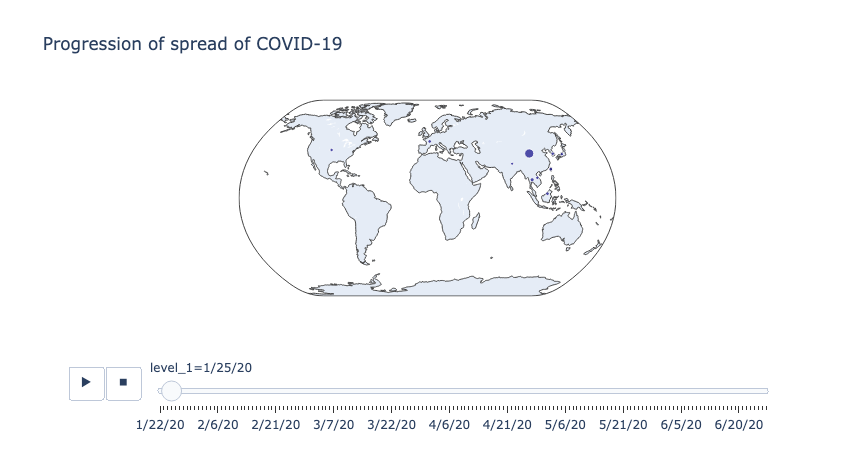

In [318]:
covid_confirm = pd.read_csv('COVID-19/confirmed_global.csv')
covid_confirm = covid_confirm.drop(['Province/State', 'Lat', 'Long'], axis = 1)
covid_confirm = covid_confirm.groupby(by = 'Country/Region').sum()

by_day_covid_confirm = covid_confirm.stack().reset_index()
by_day_covid_confirm['size'] = by_day_covid_confirm[0].pow(0.3)
by_day_covid_confirm['confirmed'] = by_day_covid_confirm[0]

fig = px.scatter_geo(by_day_covid_confirm, locations="Country/Region", locationmode='country names', 
                     color="confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, max(by_day_covid_confirm['confirmed'])+2], 
                     projection="natural earth", animation_frame="level_1", 
                     title='Progression of spread of COVID-19')
fig.update(layout_coloraxis_showscale=False)
py.offline.iplot(fig)

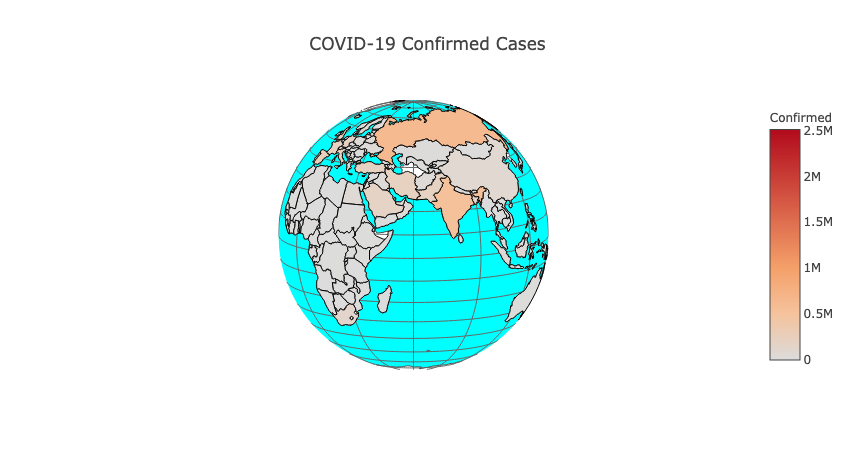

In [290]:
countries = covid.index
mean_conf = covid['confirmed']
for country in countries:

    data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_conf,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(tickprefix = '', 
            title = 'Confirmed')
            )
       ]
    


    layout = dict(
    title = 'COVID-19 Confirmed Cases',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout,colorscale=colorscale)

py.iplot(fig, validate=False, filename='worldmap')

In [297]:
global_temp_country = pd.read_csv("data-society-global-climate-change-data/original/GlobalLandTemperatures/GlobalLandTemperaturesByCountry.csv")
global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())

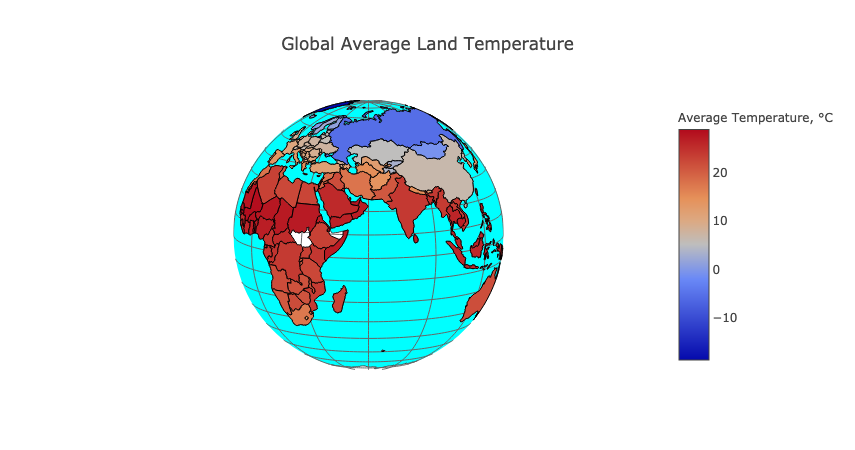

In [301]:
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Average\nTemperature,\n°C')
            )
       ]



layout = dict(
    title = 'Global Average Land Temperature',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

# Rate By Month

In [255]:
death_rate_month = (death_month/confirm_month).fillna(0)
recover_rate_month = (recover_month/confirm_month).fillna(0)
death_rate_month=death_rate_month.T.rename({1.0:'Jan', 2.0:'Feb', 3.0:'Mar', 4.0:'Apr', 5.0:'May', 6.0:'Jun'})
recover_rate_month=recover_rate_month.T.rename({1.0:'Jan', 2.0:'Feb', 3.0:'Mar', 4.0:'Apr', 5.0:'May', 6.0:'Jun'})


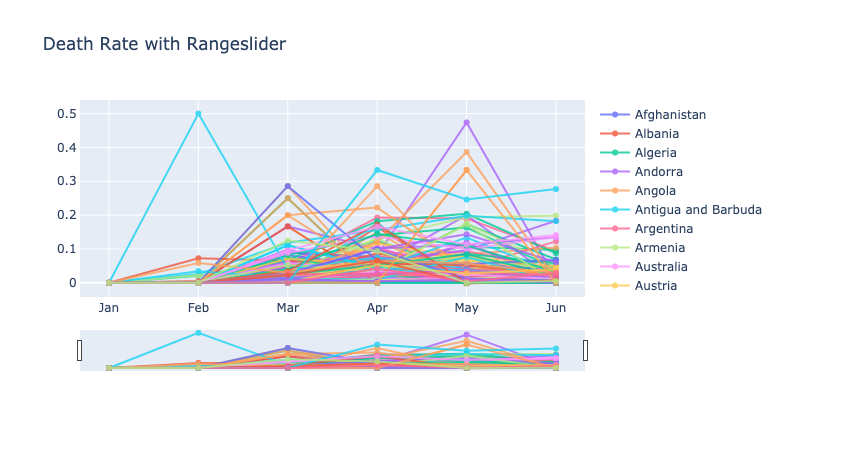

In [273]:

fig = go.Figure()

for i in np.arange(188):
    fig.add_trace(go.Scatter(
                    x=death_rate_month.index,
                    y=death_rate_month.iloc[:, i],
                    name=recover_rate_month.T.index[i],
                    opacity=0.8))


fig.update_layout(title_text='Death Rate with Rangeslider',
                  xaxis_rangeslider_visible=True)

fig.show()

# Relationship between confirmede cases and Temperature

In [438]:
stacked_confirm = pd.DataFrame(confirm_month.stack()).reset_index()
stacked_confirm['confirm'] = stacked_confirm[0]
stacked_confirm.rename(columns={'Country/Region':'Country','index':'dt'}, inplace=True)
stacked_confirm.drop(columns = [0], inplace=True)
stacked_confirm

Country  dt  confirm
0     Afghanistan   1      0.0
1     Afghanistan   2      1.0
2     Afghanistan   3    173.0
3     Afghanistan   4   1997.0
4     Afghanistan   5  13034.0
...           ...  ..      ...
1123     Zimbabwe   2      0.0
1124     Zimbabwe   3      8.0
1125     Zimbabwe   4     32.0
1126     Zimbabwe   5    138.0
1127     Zimbabwe   6    389.0

[1128 rows x 3 columns]

In [439]:
temp_month = global_temp_country[global_temp_country['Country'].isin(confirm_month.index)]
temp_month['dt']=pd.to_datetime(temp_month['dt'], errors='coerce').dt.month
temp_month = temp_month[temp_month['dt'].isin([1, 2, 3, 4, 5, 6])]
stackedtemp = temp_month.groupby(['Country', 'dt'])['AverageTemperature'].mean()
stackedtemp = pd.DataFrame(stackedtemp.reset_index())
stackedtemp

Country  dt  AverageTemperature
0    Afghanistan   1            0.469763
1    Afghanistan   2            2.916785
2    Afghanistan   3            8.416103
3    Afghanistan   4           14.499520
4    Afghanistan   5           20.288477
..           ...  ..                 ...
967     Zimbabwe   2           23.382125
968     Zimbabwe   3           22.829028
969     Zimbabwe   4           21.080319
970     Zimbabwe   5           18.534801
971     Zimbabwe   6           16.149549

[972 rows x 3 columns]

In [440]:
confirm_temp = stacked_confirm.merge(stackedtemp, left_on=['Country', 'dt'], right_on=['Country', 'dt'])
confirm_temp

Country  dt  confirm  AverageTemperature
0    Afghanistan   1      0.0            0.469763
1    Afghanistan   2      1.0            2.916785
2    Afghanistan   3    173.0            8.416103
3    Afghanistan   4   1997.0           14.499520
4    Afghanistan   5  13034.0           20.288477
..           ...  ..      ...                 ...
967     Zimbabwe   2      0.0           23.382125
968     Zimbabwe   3      8.0           22.829028
969     Zimbabwe   4     32.0           21.080319
970     Zimbabwe   5    138.0           18.534801
971     Zimbabwe   6    389.0           16.149549

[972 rows x 4 columns]

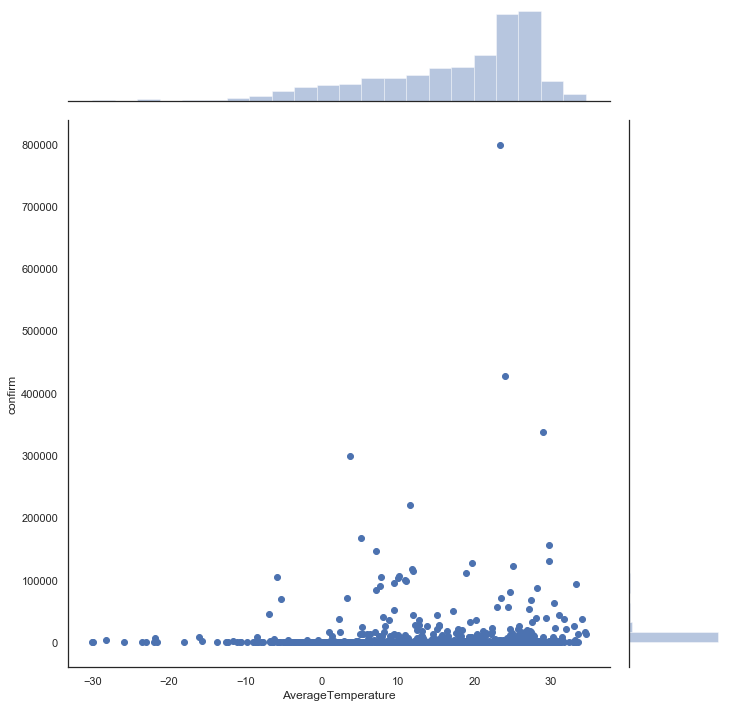

In [441]:
sns.jointplot(x="AverageTemperature", y="confirm", data=confirm_temp, size=10)

In [477]:
population = pd.read_csv('csvData.csv')
population['pop2020'] = population['pop2020']*100
population

Rank              name      pop2020      pop2019  GrowthRate     area  \
0       1             China  143932377.6  1433783.686      1.0039  9706961   
1       2             India  138000438.5  1366417.754      1.0099  3287590   
2       3     United States   33100265.1   329064.917      1.0059  9372610   
3       4         Indonesia   27352361.5   270625.568      1.0107  1904569   
4       5          Pakistan   22089234.0   216565.318      1.0200   881912   
..    ...               ...          ...          ...         ...      ...   
227   228        Montserrat        499.2        4.989      1.0006      102   
228   229  Falkland Islands        348.0        3.377      1.0305    12173   
229   230              Niue        162.6        1.615      1.0068      260   
230   231           Tokelau        135.7        1.340      1.0127       12   
231   232      Vatican City         80.1        0.799      1.0025        1   

      Density  
0    147.7068  
1    415.6290  
2     35.1092  
3    142.0928  
4    245.5634  
..        ...  
227   48.9118  
228    0.2774  
229    6.2115  
230  111.6667  
231  799.0000  

[232 rows x 7 columns]

In [478]:
confirm_temp_pop = confirm_temp.merge(population[['name', 'pop2020']], left_on = 'Country', right_on = 'name').drop(columns='name')
confirm_temp_pop

Country  dt  confirm  AverageTemperature    pop2020
0    Afghanistan   1      0.0            0.469763  3892834.6
1    Afghanistan   2      1.0            2.916785  3892834.6
2    Afghanistan   3    173.0            8.416103  3892834.6
3    Afghanistan   4   1997.0           14.499520  3892834.6
4    Afghanistan   5  13034.0           20.288477  3892834.6
..           ...  ..      ...                 ...        ...
961     Zimbabwe   2      0.0           23.382125  1486292.4
962     Zimbabwe   3      8.0           22.829028  1486292.4
963     Zimbabwe   4     32.0           21.080319  1486292.4
964     Zimbabwe   5    138.0           18.534801  1486292.4
965     Zimbabwe   6    389.0           16.149549  1486292.4

[966 rows x 5 columns]

In [479]:
confirm_temp_pop['ratio'] = confirm_temp_pop['confirm']/confirm_temp_pop['pop2020']


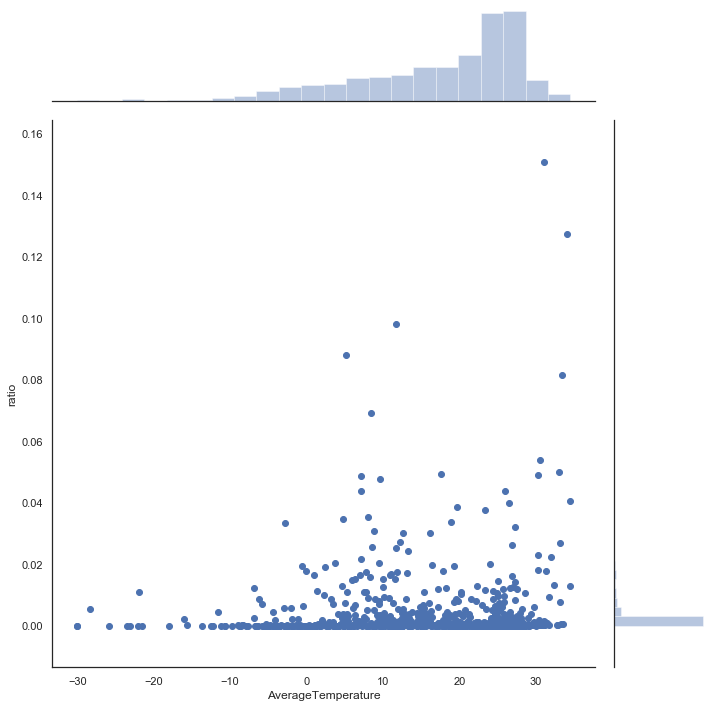

In [480]:
sns.jointplot(x="AverageTemperature", y="ratio", data=confirm_temp_pop, size=10)


However, all I have here is only correlation. Not a causation.

It's true that the virus is more prevelant in colder countries in the Northern Hemisphere. But that fact on it's own doesn't equal causation. becuase there are more factor that causing this result such as goverment policy, population density and some so on.

For example, those mild countries also tend to have higher GDPs, and experience a lot of international air travel, offering more oppotunites for the virus to spread to more people in the same amount of time.